1. BUSINESS UNDERSTANDING<br>
This analysis focused accidents occurred in United State's Aviation. In the Dataset provided , we will check the causes accidents as recorded in the NTSB Database.Later we will provide recommendations to the aviation sector to reduce  further accidents.

2. DATA UNDERSTANDING

In [128]:
#Importing the necessary libraries
import pandas as pd #Pandas Library
import numpy as np #Numpy Library
import matplotlib.pyplot as plt #Matplotlib library
import seaborn as sns #Seaborn library

In [132]:
#Reading our dataset in csv file and name variable df(Dataframe)
df = pd.read_csv('AviationData.csv', encoding= 'latin-1')
df

c:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [133]:
#check datatype
type(df)

pandas.core.frame.DataFrame

In [134]:
#Copy the original Dataset
data = df.copy()

In [135]:
#checking the rows and columns 
df.shape

(88889, 31)

Our Dataset has 88889 rows and 31 columns

In [136]:
#Checking the first 5 rows of our Dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [137]:
#Checking the last 5 rows of our dataset
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [138]:
#Statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [139]:
#Checking the columns 
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [140]:
#Reading the second dataset in CSV FILE 
df_State = pd.read_csv('USState_Codes.csv')
df_State

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO


In [141]:
#Checking the datatype
type(df_State)

pandas.core.frame.DataFrame

In [142]:
#Checking the number of rows and columns
df_State.shape

(62, 2)

it has 62 rows and 2 columns

In [143]:
#Checking the first 10 rows 
df_State.head(10)

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [144]:
#Checking the last 5 rows
df_State.tail()

,US_State,Abbreviation
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO
61,Pacific ocean,PO


In [145]:
#Listing columns
df_State.columns

Index(['US_State', 'Abbreviation'], dtype='object')

3. Data preparation

In [146]:
#Know more about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [147]:
#Checking Duplicates
df.duplicated().sum()

0

In [148]:
#Checking null values in each columns
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [149]:
#Replacing (.) to (_) in our columns for readability purpose
df.columns = df.columns.str.replace('.', '_')

In [150]:

df

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [151]:
#Converting the Event_Date from object to Datetime datatype
df['Event_Date'] = pd.to_datetime(df['Event_Date'])

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                88889 non-null  object        
 1   Investigation_Type      88889 non-null  object        
 2   Accident_Number         88889 non-null  object        
 3   Event_Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport_Code            50249 non-null  object        
 9   Airport_Name            52790 non-null  object        
 10  Injury_Severity         87889 non-null  object        
 11  Aircraft_damage         85695 non-null  object        
 12  Aircraft_Category       32287 non-null  object

In [153]:
# dropping columns that are NOT necesssary 
df = df.drop(columns= ['Event_Id', 'Accident_Number', 'Airport_Code', 'Airport_Name', 'Registration_Number','Publication_Date' ])

In [154]:
type(df)

pandas.core.frame.DataFrame

In [155]:
#Not important in the analysis
df = df.drop(columns= ['Report_Status'])

In [156]:
df.columns

Index(['Investigation_Type', 'Event_Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Injury_Severity', 'Aircraft_damage', 'Aircraft_Category',
       'Make', 'Model', 'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'FAR_Description', 'Schedule', 'Purpose_of_flight', 'Air_carrier',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight'],
      dtype='object')

In [157]:
#Dropping columns with more missing values
df = df.drop(columns= ['Latitude','Longitude', 'Aircraft_Category', 'FAR_Description', 'Schedule', 'Air_carrier', 'Broad_phase_of_flight'])

In [158]:
type(df)

pandas.core.frame.DataFrame

In [159]:
df.columns

Index(['Investigation_Type', 'Event_Date', 'Location', 'Country',
       'Injury_Severity', 'Aircraft_damage', 'Make', 'Model', 'Amateur_Built',
       'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition'],
      dtype='object')

In [160]:
df.head(20)

,Investigation_Type,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC
5,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC
6,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC
7,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC
8,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC
9,Accident,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC


In [161]:
#Weather_Condition representation counts 
df['Weather_Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather_Condition, dtype: int64

In [162]:
df['Make'].value_counts()

Cessna                            22227
Piper                             12029
CESSNA                             4922
Beech                              4330
PIPER                              2841
                                  ...  
Biuro Projektowe B Bogumil Ber        1
BRUPBACHER CHRIS                      1
Kokes                                 1
Wild Goose                            1
CENTRAL MISSOURI STATE UNIV           1
Name: Make, Length: 8237, dtype: int64

In [163]:
df['Country'].value_counts()

United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
                  ...  
BLOCK 651A            1
Seychelles            1
Chad                  1
Guernsey              1
French Guiana         1
Name: Country, Length: 219, dtype: int64

In [164]:
df['Location'].value_counts()

ANCHORAGE, AK              434
MIAMI, FL                  200
ALBUQUERQUE, NM            196
HOUSTON, TX                193
CHICAGO, IL                184
                          ... 
Barter Island, AK            1
PORUM, OK                    1
TYSFORD, United Kingdom      1
ROCK SPRING, WY              1
SWAN, IA                     1
Name: Location, Length: 27758, dtype: int64

In [165]:
#Since my analysis is focus united states only, I drop the rest of the countries
df = df[df['Country'] == 'United States']

In [166]:
#Since my analysis focus only on accidents , i drop incidents.
df = df[df['Investigation_Type'] == 'Accident']

In [167]:
type(df)

pandas.core.frame.DataFrame

In [168]:
df.shape

(79906, 17)

In [169]:
df

,Investigation_Type,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN
88885,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
88886,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC
88887,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN


In [170]:
df.isna().sum()

Investigation_Type            0
Event_Date                    0
Location                     11
Country                       0
Injury_Severity              52
Aircraft_damage            1124
Make                         12
Model                        29
Amateur_Built                15
Number_of_Engines          1759
Engine_Type                2899
Purpose_of_flight          1881
Total_Fatal_Injuries      10265
Total_Serious_Injuries    10985
Total_Minor_Injuries      10355
Total_Uninjured            4995
Weather_Condition           561
dtype: int64

In [171]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,78147.0,1.109959,0.382682,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,69641.0,0.433251,2.466484,0.0,0.0,0.0,0.0,265.0
Total_Serious_Injuries,68921.0,0.261909,1.104213,0.0,0.0,0.0,0.0,137.0
Total_Minor_Injuries,69551.0,0.333396,1.279756,0.0,0.0,0.0,0.0,125.0
Total_Uninjured,74911.0,2.738730,16.840119,0.0,0.0,1.0,2.0,699.0


In [172]:
df['Total_Fatal_Injuries'].head(20)

0     2.0
1     4.0
2     3.0
3     2.0
4     1.0
5     NaN
6     4.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    1.0
14    1.0
15    2.0
16    0.0
17    3.0
18    0.0
19    0.0
Name: Total_Fatal_Injuries, dtype: float64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79906 entries, 0 to 88888
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation_Type      79906 non-null  object        
 1   Event_Date              79906 non-null  datetime64[ns]
 2   Location                79895 non-null  object        
 3   Country                 79906 non-null  object        
 4   Injury_Severity         79854 non-null  object        
 5   Aircraft_damage         78782 non-null  object        
 6   Make                    79894 non-null  object        
 7   Model                   79877 non-null  object        
 8   Amateur_Built           79891 non-null  object        
 9   Number_of_Engines       78147 non-null  float64       
 10  Engine_Type             77007 non-null  object        
 11  Purpose_of_flight       78025 non-null  object        
 12  Total_Fatal_Injuries    69641 non-null  float6

In [174]:
#Converting date_time from yyyy.mm.dd to dd.mm.YYYY
df['Event_Date'] = df['Event_Date'].dt.strftime('%d.%m.%Y')

In [175]:
df

,Investigation_Type,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition
0,Accident,24.10.1948,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,Accident,19.07.1962,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,Accident,30.08.1974,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,Accident,19.06.1977,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,Accident,02.08.1979,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,26.12.2022,"Annapolis, MD",United States,Minor,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN
88885,Accident,26.12.2022,"Hampton, NH",United States,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
88886,Accident,26.12.2022,"Payson, AZ",United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC
88887,Accident,26.12.2022,"Morgan, UT",United States,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN


In [176]:
type(df)

pandas.core.frame.DataFrame

In [177]:
df['Make'].value_counts()

Cessna                         21342
Piper                          11522
CESSNA                          4227
Beech                           4018
PIPER                           2487
                               ...  
DARNEY                             1
CASE RICHARD L                     1
JUNEAU (Zenith Aircraft Co)        1
MOULTON HOWARD WELLS               1
STEPHEN L KRUER                    1
Name: Make, Length: 7954, dtype: int64

In [179]:
type(df['Make'])

pandas.core.series.Series

In [180]:
#Capitilizing Make column
df['Make'] = df['Make'].str.title()

In [181]:
df['Make'].value_counts()

Cessna                25569
Piper                 14009
Beech                  4892
Bell                   2236
Mooney                 1272
                      ...  
Lewis Jennings            1
Mccowan Steve A           1
Robert L. Kennedy         1
Morgan, Marvin R.         1
Antonovich Anton B        1
Name: Make, Length: 7368, dtype: int64

In [182]:
df['Weather_Condition'].value_counts()

VMC    73342
IMC     5390
UNK      516
Unk       97
Name: Weather_Condition, dtype: int64

In [183]:
df['Weather_Condition']= df['Weather_Condition'].str.title()

In [184]:
df['Weather_Condition'].value_counts()

Vmc    73342
Imc     5390
Unk      613
Name: Weather_Condition, dtype: int64

In [185]:
#Filling all numerical columns having null values with median
df[df.select_dtypes(include=[np.number]).columns] = df.select_dtypes(include=[np.number]).fillna(df.median())

In [186]:
#filling all non-numerical columns values having null values with mode
df[df.select_dtypes(include=[object]).columns] = df.select_dtypes(include=[object]).fillna(df.mode().iloc[0])

In [187]:
df

,Investigation_Type,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition
0,Accident,24.10.1948,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unk
1,Accident,19.07.1962,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unk
2,Accident,30.08.1974,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,Imc
3,Accident,19.06.1977,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Imc
4,Accident,02.08.1979,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,Vmc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,26.12.2022,"Annapolis, MD",United States,Minor,Substantial,Piper,PA-28-151,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,Vmc
88885,Accident,26.12.2022,"Hampton, NH",United States,Non-Fatal,Substantial,Bellanca,7ECA,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,Vmc
88886,Accident,26.12.2022,"Payson, AZ",United States,Non-Fatal,Substantial,American Champion Aircraft,8GCBC,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,Vmc
88887,Accident,26.12.2022,"Morgan, UT",United States,Non-Fatal,Substantial,Cessna,210N,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,Vmc


In [188]:
type(df)

pandas.core.frame.DataFrame

In [189]:
df.isna().sum()

Investigation_Type        0
Event_Date                0
Location                  0
Country                   0
Injury_Severity           0
Aircraft_damage           0
Make                      0
Model                     0
Amateur_Built             0
Number_of_Engines         0
Engine_Type               0
Purpose_of_flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
dtype: int64

In [190]:
df['Country'].value_counts()

United States    79906
Name: Country, dtype: int64

In [191]:
df['Injury_Severity'].value_counts()

Non-Fatal      64510
Fatal(1)        5852
Fatal           3555
Fatal(2)        3445
Fatal(3)        1017
Fatal(4)         709
Minor            203
Fatal(5)         176
Serious          153
Fatal(6)         115
Fatal(7)          37
Fatal(8)          29
Fatal(10)         17
Unavailable       15
Fatal(9)           8
Fatal(14)          6
Fatal(11)          5
Fatal(12)          5
Fatal(18)          3
Fatal(17)          3
Fatal(13)          3
Fatal(25)          3
Fatal(82)          2
Fatal(34)          2
Fatal(20)          2
Fatal(23)          2
Fatal(43)          1
Fatal(37)          1
Fatal(27)          1
Fatal(28)          1
Fatal(92)          1
Fatal(21)          1
Fatal(65)          1
Fatal(73)          1
Fatal(265)         1
Fatal(230)         1
Fatal(68)          1
Fatal(29)          1
Fatal(135)         1
Fatal(15)          1
Fatal(16)          1
Fatal(111)         1
Fatal(31)          1
Fatal(156)         1
Fatal(132)         1
Fatal(88)          1
Fatal(44)          1
Fatal(49)    

In [192]:
#Removing numbers data cells in Injury_Severity column for uniformity 
df['Injury_Severity'] = df['Injury_Severity'].str.replace(r'\(.*\)', '' , regex=True)

In [193]:
df['Engine_Type'].value_counts()

Reciprocating    70808
Turbo Shaft       3227
Turbo Prop        2810
Unknown           1356
Turbo Fan         1235
Turbo Jet          436
None                19
Electric             9
NONE                 2
LR                   2
UNK                  1
Hybrid Rocket        1
Name: Engine_Type, dtype: int64

In [194]:
df['Engine_Type'] = df['Engine_Type'].str.replace(r'Unknown|None|NONE|UNK', 'Unknown', regex=True)

In [195]:
df['Engine_Type'].value_counts()

Reciprocating    70808
Turbo Shaft       3227
Turbo Prop        2810
Unknown           1378
Turbo Fan         1235
Turbo Jet          436
Electric             9
LR                   2
Hybrid Rocket        1
Name: Engine_Type, dtype: int64

In [196]:
df.isna().sum()

Investigation_Type        0
Event_Date                0
Location                  0
Country                   0
Injury_Severity           0
Aircraft_damage           0
Make                      0
Model                     0
Amateur_Built             0
Number_of_Engines         0
Engine_Type               0
Purpose_of_flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
dtype: int64

In [197]:
df['Weather_Condition'].value_counts()

Vmc    73903
Imc     5390
Unk      613
Name: Weather_Condition, dtype: int64

In [198]:
df['Weather_Condition'] = df['Weather_Condition'].str.replace('Unk', 'Unknown', regex=True)

In [199]:
df['Weather_Condition'].value_counts()

Vmc        73903
Imc         5390
Unknown      613
Name: Weather_Condition, dtype: int64

In [200]:
df['Location'].head(20)

0      MOOSE CREEK, ID
1       BRIDGEPORT, CA
2        Saltville, VA
3           EUREKA, CA
4           Canton, OH
5           BOSTON, MA
6           COTTON, MN
7          PULLMAN, WA
8     EAST HANOVER, NJ
9     JACKSONVILLE, FL
10           HOBBS, NM
11        TUSKEGEE, AL
12           HOMER, LA
13          HEARNE, TX
14       CHICKASHA, OK
15     LITTLE ROCK, AR
16          MIDWAY, UT
17         SKWENTA, AK
18         GALETON, PA
19           MIAMI, FL
Name: Location, dtype: object

In [201]:
df['Location'].str.count(',').max()

2

In [202]:
df['Location'].value_counts()

ANCHORAGE, AK          416
ALBUQUERQUE, NM        192
HOUSTON, TX            174
FAIRBANKS, AK          169
MIAMI, FL              158
                      ... 
AVON, CT                 1
Emigrant, MT             1
KAHLOTUS, WA             1
NEAR STERLING C, TX      1
New Berlin, WI           1
Name: Location, Length: 22851, dtype: int64

In [203]:
#Separating data in Location column into 3 new columns.  The data are seperated by (,).  
df[['Town', 'State', 'Unknown']] = df['Location'].str.split(',', expand=True)

In [204]:
df

,Investigation_Type,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Town,State,Unknown
0,Accident,24.10.1948,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unknown,MOOSE CREEK,ID,None
1,Accident,19.07.1962,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,BRIDGEPORT,CA,None
2,Accident,30.08.1974,"Saltville, VA",United States,Fatal,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,Imc,Saltville,VA,None
3,Accident,19.06.1977,"EUREKA, CA",United States,Fatal,Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Imc,EUREKA,CA,None
4,Accident,02.08.1979,"Canton, OH",United States,Fatal,Destroyed,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,Vmc,Canton,OH,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,26.12.2022,"Annapolis, MD",United States,Minor,Substantial,Piper,PA-28-151,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,Vmc,Annapolis,MD,None
88885,Accident,26.12.2022,"Hampton, NH",United States,Non-Fatal,Substantial,Bellanca,7ECA,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,Vmc,Hampton,NH,None
88886,Accident,26.12.2022,"Payson, AZ",United States,Non-Fatal,Substantial,American Champion Aircraft,8GCBC,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,Vmc,Payson,AZ,None
88887,Accident,26.12.2022,"Morgan, UT",United States,Non-Fatal,Substantial,Cessna,210N,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,Vmc,Morgan,UT,None


In [205]:
df['Unknown'].isna().sum()

79876

In [206]:
#Dropping Locations and Unknown columns which has no value in our analysis
df = df.drop(columns= ['Unknown', 'Location'])

In [207]:
df

,Investigation_Type,Event_Date,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Town,State
0,Accident,24.10.1948,United States,Fatal,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unknown,MOOSE CREEK,ID
1,Accident,19.07.1962,United States,Fatal,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,BRIDGEPORT,CA
2,Accident,30.08.1974,United States,Fatal,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,Imc,Saltville,VA
3,Accident,19.06.1977,United States,Fatal,Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Imc,EUREKA,CA
4,Accident,02.08.1979,United States,Fatal,Destroyed,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,Vmc,Canton,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,26.12.2022,United States,Minor,Substantial,Piper,PA-28-151,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,Vmc,Annapolis,MD
88885,Accident,26.12.2022,United States,Non-Fatal,Substantial,Bellanca,7ECA,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,Vmc,Hampton,NH
88886,Accident,26.12.2022,United States,Non-Fatal,Substantial,American Champion Aircraft,8GCBC,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,Vmc,Payson,AZ
88887,Accident,26.12.2022,United States,Non-Fatal,Substantial,Cessna,210N,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,Vmc,Morgan,UT


In [208]:
type(df)

pandas.core.frame.DataFrame

In [209]:
df['Town'].isna().sum()

0

In [210]:
df['State'].isna().sum()

0

In [211]:
#Renaming State column to State_Abbreviation to make uniform for the other Dataframe for merging purposes
df = df.rename(columns={'State': 'State_Abbreviation'})

In [212]:
df

,Investigation_Type,Event_Date,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Town,State_Abbreviation
0,Accident,24.10.1948,United States,Fatal,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unknown,MOOSE CREEK,ID
1,Accident,19.07.1962,United States,Fatal,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,BRIDGEPORT,CA
2,Accident,30.08.1974,United States,Fatal,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,Imc,Saltville,VA
3,Accident,19.06.1977,United States,Fatal,Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Imc,EUREKA,CA
4,Accident,02.08.1979,United States,Fatal,Destroyed,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,Vmc,Canton,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,26.12.2022,United States,Minor,Substantial,Piper,PA-28-151,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,Vmc,Annapolis,MD
88885,Accident,26.12.2022,United States,Non-Fatal,Substantial,Bellanca,7ECA,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,Vmc,Hampton,NH
88886,Accident,26.12.2022,United States,Non-Fatal,Substantial,American Champion Aircraft,8GCBC,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,Vmc,Payson,AZ
88887,Accident,26.12.2022,United States,Non-Fatal,Substantial,Cessna,210N,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,Vmc,Morgan,UT


In [213]:
type(df)

pandas.core.frame.DataFrame

In [214]:
#Renaming Abbreviation in df_state dataframe to State_Abbreviation for merging purpose
df_State = df_State.rename(columns={'Abbreviation': 'State_Abbreviation'})

In [215]:
df

,Investigation_Type,Event_Date,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Town,State_Abbreviation
0,Accident,24.10.1948,United States,Fatal,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unknown,MOOSE CREEK,ID
1,Accident,19.07.1962,United States,Fatal,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,BRIDGEPORT,CA
2,Accident,30.08.1974,United States,Fatal,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,Imc,Saltville,VA
3,Accident,19.06.1977,United States,Fatal,Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Imc,EUREKA,CA
4,Accident,02.08.1979,United States,Fatal,Destroyed,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,Vmc,Canton,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,26.12.2022,United States,Minor,Substantial,Piper,PA-28-151,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,Vmc,Annapolis,MD
88885,Accident,26.12.2022,United States,Non-Fatal,Substantial,Bellanca,7ECA,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,Vmc,Hampton,NH
88886,Accident,26.12.2022,United States,Non-Fatal,Substantial,American Champion Aircraft,8GCBC,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,Vmc,Payson,AZ
88887,Accident,26.12.2022,United States,Non-Fatal,Substantial,Cessna,210N,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,Vmc,Morgan,UT


In [216]:
df.shape

(79906, 18)

In [217]:
df['State_Abbreviation'].unique()

array([' ID', ' CA', ' VA', ' OH', ' MA', ' MN', ' WA', ' NJ', ' FL',
       ' NM', ' AL', ' LA', ' TX', ' OK', ' AR', ' UT', ' AK', ' PA',
       ' MI', ' GA', ' NC', ' NY', ' MT', ' OR', ' NV', ' IN', ' AZ',
       ' MO', ' WY', ' IL', ' SC', ' MD', ' HI', ' CO', ' MS', ' DC',
       ' VT', ' KS', ' NH', ' IA', ' WI', ' CT', ' KY', ' TN', ' ME',
       ' SD', ' NE', ' RI', ' ND', ' WV', ' DE', ' HONOLULU', ' OAHU',
       ' PR', " MANU'A", 'OAHU', 'MAUI', ' GU', ' KAUAI', ' PO',
       'MOLOKAI', ' MAUI', ' GM', ' AO', ' UN', ' Oahu', 'Kauai', ' VI',
       ' NYC', '', ' San Juan Is.', ' Maui', ' OF', ' MG', ' CB'],
      dtype=object)

In [218]:
df.columns

Index(['Investigation_Type', 'Event_Date', 'Country', 'Injury_Severity',
       'Aircraft_damage', 'Make', 'Model', 'Amateur_Built',
       'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition', 'Town',
       'State_Abbreviation'],
      dtype='object')

In [219]:
df_State.columns

Index(['US_State', 'State_Abbreviation'], dtype='object')

In [220]:
#State_Abbreviation 
df = df.rename(columns={'State_Abbreviation': 'State_Abbreviation'})

In [221]:
type(df)

pandas.core.frame.DataFrame

In [222]:
df_State= df_State.rename(columns={'State_Abbreviation': 'State_Abbreviation'})

In [223]:
df['Total_Fatal_Injuries']

0        2.0
1        4.0
2        3.0
3        2.0
4        1.0
        ... 
88884    0.0
88885    0.0
88886    0.0
88887    0.0
88888    0.0
Name: Total_Fatal_Injuries, Length: 79906, dtype: float64

In [224]:
type(df)

pandas.core.frame.DataFrame

In [225]:
df['State_Abbreviation'] = df['State_Abbreviation'].str.strip().str.upper()

In [226]:
type(df)

pandas.core.frame.DataFrame

In [227]:
df_State['State_Abbreviation'] = df_State['State_Abbreviation'].str.strip().str.upper()

In [228]:
#Merging both Dataframes and State_Abbreviation as common column for both Dataframe and transfered US_State column to the left
df_merged = pd.merge(df, df_State ,  on='State_Abbreviation' , how='left')

In [229]:
df_merged

,Investigation_Type,Event_Date,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Town,State_Abbreviation,US_State
0,Accident,24.10.1948,United States,Fatal,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unknown,MOOSE CREEK,ID,Idaho
1,Accident,19.07.1962,United States,Fatal,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,BRIDGEPORT,CA,California
2,Accident,30.08.1974,United States,Fatal,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,Imc,Saltville,VA,Virginia
3,Accident,19.06.1977,United States,Fatal,Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Imc,EUREKA,CA,California
4,Accident,02.08.1979,United States,Fatal,Destroyed,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,Vmc,Canton,OH,Ohio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79901,Accident,26.12.2022,United States,Minor,Substantial,Piper,PA-28-151,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,Vmc,Annapolis,MD,Maryland
79902,Accident,26.12.2022,United States,Non-Fatal,Substantial,Bellanca,7ECA,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,Vmc,Hampton,NH,New Hampshire
79903,Accident,26.12.2022,United States,Non-Fatal,Substantial,American Champion Aircraft,8GCBC,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,Vmc,Payson,AZ,Arizona
79904,Accident,26.12.2022,United States,Non-Fatal,Substantial,Cessna,210N,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,Vmc,Morgan,UT,Utah


In [230]:
df_merged['State_Abbreviation'].isna().sum()

0

In [231]:
df_merged.shape

(79906, 19)

In [232]:
#Dropping null values rows. it won't affect our analysis because the cummulative percentage is so small to be ignored
df_merged = df_merged.dropna()

In [233]:
df_merged.shape

(79811, 19)

In [234]:
df_merged.columns

Index(['Investigation_Type', 'Event_Date', 'Country', 'Injury_Severity',
       'Aircraft_damage', 'Make', 'Model', 'Amateur_Built',
       'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition', 'Town',
       'State_Abbreviation', 'US_State'],
      dtype='object')

In [235]:
#I have observed Investigation_Type columns has "Accidents" as data thus no value in our analysis
df_merged= df_merged.drop(columns= ['Investigation_Type'])

In [236]:
#Converting The merged Dataframe to csv
df_merged.to_csv('Clean_Data.csv', index=False)

In [237]:
df_merged.shape

(79811, 18)

In [238]:
df_merged.columns

Index(['Event_Date', 'Country', 'Injury_Severity', 'Aircraft_damage', 'Make',
       'Model', 'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition', 'Town',
       'State_Abbreviation', 'US_State'],
      dtype='object')

In [239]:
df_merged['Event_Date'].head(20)

0     24.10.1948
1     19.07.1962
2     30.08.1974
3     19.06.1977
4     02.08.1979
5     17.09.1979
6     01.08.1981
7     01.01.1982
8     01.01.1982
9     01.01.1982
10    01.01.1982
11    01.01.1982
12    02.01.1982
13    02.01.1982
14    02.01.1982
15    02.01.1982
16    02.01.1982
17    02.01.1982
18    02.01.1982
19    02.01.1982
Name: Event_Date, dtype: object

In [240]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79811 entries, 0 to 79905
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Date              79811 non-null  object 
 1   Country                 79811 non-null  object 
 2   Injury_Severity         79811 non-null  object 
 3   Aircraft_damage         79811 non-null  object 
 4   Make                    79811 non-null  object 
 5   Model                   79811 non-null  object 
 6   Amateur_Built           79811 non-null  object 
 7   Number_of_Engines       79811 non-null  float64
 8   Engine_Type             79811 non-null  object 
 9   Purpose_of_flight       79811 non-null  object 
 10  Total_Fatal_Injuries    79811 non-null  float64
 11  Total_Serious_Injuries  79811 non-null  float64
 12  Total_Minor_Injuries    79811 non-null  float64
 13  Total_Uninjured         79811 non-null  float64
 14  Weather_Condition       79811 non-null

In [241]:
#I don't how but seen Event_Date changed to object Datatype. so i want to convert back to Datetime Datatype
df_merged['Event_Date'] = pd.to_datetime(df_merged['Event_Date'])

In [242]:
#I want to create a new column for Year. 
df_merged['Year'] = df_merged['Event_Date'].dt.year 

In [243]:
df_merged= df_merged.drop(columns= ['Event_Date'])

In [244]:
df_merged= df_merged.drop(columns= ['Country'])

In [245]:
df_merged.columns

Index(['Injury_Severity', 'Aircraft_damage', 'Make', 'Model', 'Amateur_Built',
       'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition', 'Town',
       'State_Abbreviation', 'US_State', 'Year'],
      dtype='object')

In [246]:
df_merged.to_csv('Clean_Data.csv', index=False)

In [247]:
type(df_merged)

pandas.core.frame.DataFrame

4. Data Visualization

We want to see the relationships between Years and accidents. We want to analyse trends over time. We will plot for 35 years against the accidents. Since it include time, we will use Line Plot

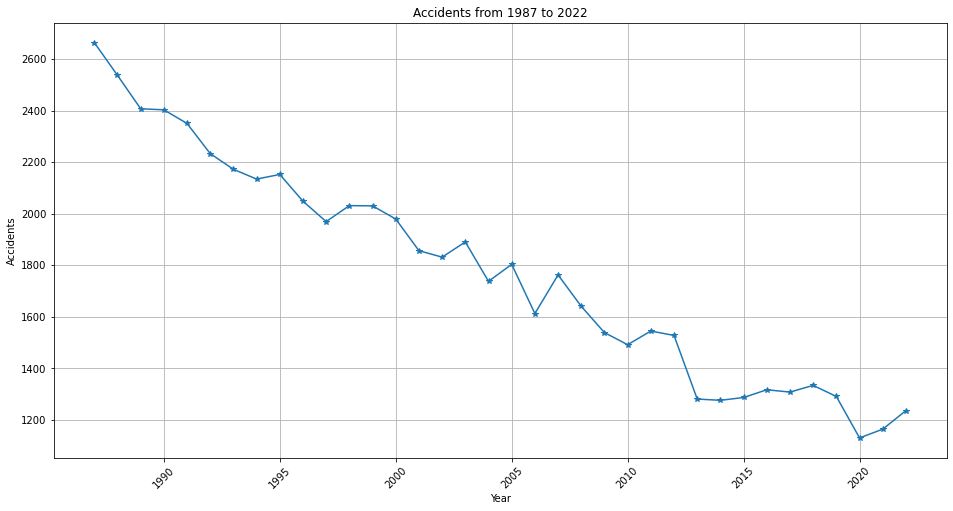

In [248]:
Filtered_Years = df_merged[(df_merged['Year'] >= 1987 )& (df_merged['Year'] <=2022)]
accidents = Filtered_Years.groupby('Year').size()
plt.figure(figsize=(16, 8))
plt.plot(accidents.index , accidents.values , marker = '*' )
plt.title('Accidents from 1987 to 2022')
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

On the line plot, it shows decreasing of accidents from 1987 to 2022. it indicate an improvement in aviation sector.

In [249]:
df_merged['Year'].value_counts().tail(20)

2011    1544
2009    1538
2012    1527
2010    1491
2018    1333
2016    1316
2017    1307
2019    1290
2015    1286
2013    1280
2014    1275
2022    1235
2021    1163
2020    1129
1979       2
1977       1
1948       1
1981       1
1962       1
1974       1
Name: Year, dtype: int64

In [250]:
df_merged['Make'].value_counts()

Cessna                25558
Piper                 13996
Beech                  4890
Bell                   2223
Mooney                 1272
                      ...  
Lewis Jennings            1
Mccowan Steve A           1
Robert L. Kennedy         1
Morgan, Marvin R.         1
Antonovich Anton B        1
Name: Make, Length: 7365, dtype: int64

To analyze accidents by aircrafts make, we will use a bar graph because its categorical data. we will chose the top 10 aircraft make that are mostly involved in accidents

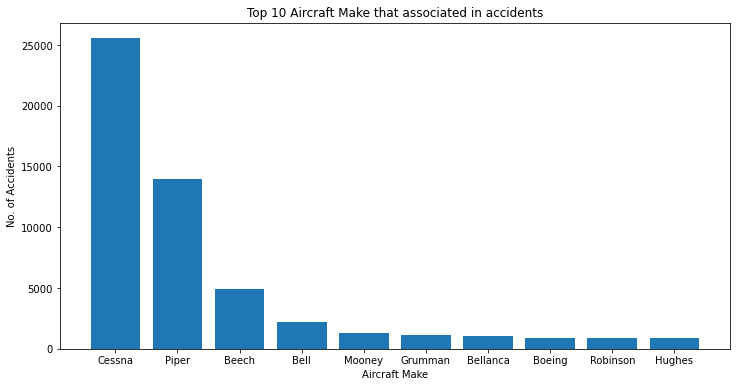

In [251]:
top_10_accidents_make = df_merged['Make'].value_counts().head(10)
plt.figure(figsize=(12 , 6))
plt.bar(top_10_accidents_make.index , top_10_accidents_make.values)
plt.title('Top 10 Aircraft Make that associated in accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('No. of Accidents')
plt.show()

Finding of 10 most aircraft make that are involved accidents


On the above bar graph, Cessna Aircraft are mostly involved an accident. Piper and Beech aircrafts also have significant scenarios of accidents. 

In [252]:
df_merged['Amateur_Built'].value_counts()

No     71519
Yes     8292
Name: Amateur_Built, dtype: int64

In [257]:
df_merged['US_State'].value_counts().head(10)

California    8691
Texas         5752
Florida       5559
Alaska        5541
Arizona       2802
Colorado      2576
Washington    2549
Michigan      1980
Georgia       1929
Illinois      1873
Name: US_State, dtype: int64

I want to visualize in a pie chart the top 10 states with the most accidents and with percentage displayed in each state

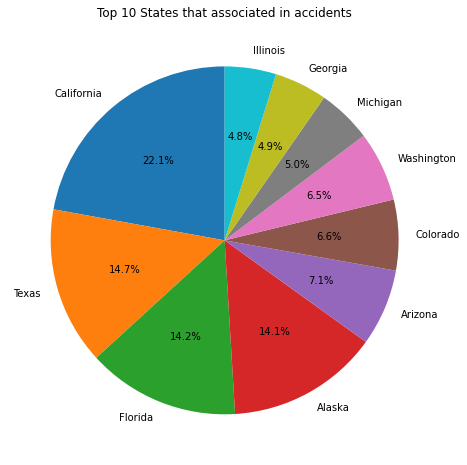

In [265]:
top_10_accidents_States = df_merged['US_State'].value_counts().head(10)
plt.figure(figsize=(18 , 8))
plt.pie(top_10_accidents_States.values ,labels=top_10_accidents_States.index , startangle=90 , autopct= '%1.1f%%' )
plt.title('Top 10 States that associated in accidents')
plt.show()

The above pie chart shows California ,Texas , Florida and Alaska have the highest number of accidents. 

In [253]:
df_merged.columns

Index(['Injury_Severity', 'Aircraft_damage', 'Make', 'Model', 'Amateur_Built',
       'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition', 'Town',
       'State_Abbreviation', 'US_State', 'Year'],
      dtype='object')

We want to analyze the correlation among numerical columns. we use a heatmap

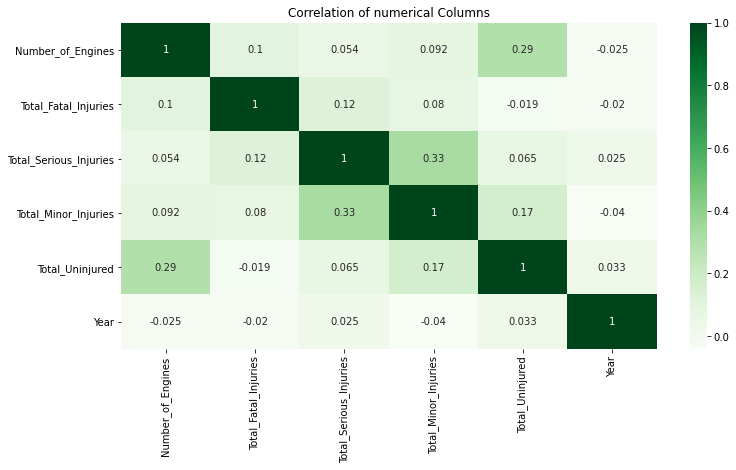

In [254]:
numerical_cols = df_merged[['Number_of_Engines','Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured','Year']]
correlation = numerical_cols.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation , cmap = 'Greens', annot=True)
plt.title("Correlation of numerical Columns")
plt.show()

Correlation among numerical columns 


The result is largely negative thus weak correction among them

RECOMENDATIONS AND THEIR IMPACT <br><br>
1. Maintenance <br><br>
For all aircrafts should be maintained regularly.Bofore the departure must be checked and approved by aviation department for the safety of the aircrafts, pilot and other users.<br><br>
2. Suspension of high risk aircrafts <br>
The Cessna , Piper and Beech aircrafts must be suspended with the immediate effect. Generally those aircrafts have mechanical problem .Also introduce a periodic inspection of the aircrafts.  The regulatory body should approved if their safe for transport. Thus gaining confidence from the users<br><br>
3. Improving safety of high risk states <br>
California ,Texas , Florida and Alaska should be investigated the high cause of accidents. Some factors could be contributed like Weather condition , human error and possibly mechanical problem regarding the aircrafts. This will enhance aviation safety <br><br>
4. Technologies <br>
Airlines company should adopt the modern technology aircraft which enhance safety and reduce the accidents caused by older models. This will signal out any slight mechanical failure hence increased efficiency<br><br>
5. Training <br>
Human error contribute majorly to the occurance of accidents. The aviation should provide safety training program for pilots. <br><br>

